## 1. Collecte et Compréhension des Données








*  Importation des librairies Python







In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import psycopg2
from psycopg2 import sql





*  Collecte des Données d'un fichier CSV











In [25]:
df_forestfires = pd.read_csv('forestfires.csv')

*  Format de la dataframe





In [26]:
nombre_colonnes = df_forestfires.shape[1]
nombre_lignes = df_forestfires.shape[0]
print(f"Nombre de colonnes : {nombre_colonnes}")
print(f"Nombre de lignes : {nombre_lignes}")

Nombre de colonnes : 13
Nombre de lignes : 517


*  Les premières lignes




In [27]:
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


*   Informations générales des champs et des enregistrements
du DataFrame







In [28]:
df_forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**X** (Numérique , valeurs : 1 à 9)

Coordonnée spatiale sur l'axe des abscisses d'un point spécifique dans le parc naturel de Montesinho.

Elle indique l'emplacement approximatif où un incendie de forêt a été observé.

---



**Y** (Numérique, valeurs : 2 à 9)

Cette colonne représente la coordonnée spatiale sur l'axe des ordonnées (vertical) d'un point spécifique dans le parc naturel de Montesinho. Comme la colonne X, elle aide à localiser l'incendie.


---



**Month** (Catégorielle, valeurs : "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

Mois de l'année.


---


**day** (Catégorielle, valeurs :  "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")

Jour de la semaine.


---


**FFMC = Fine Fuel Moisture Code**(Numérique, valeurs : 18.7 à 96.20)

Indice du système Fire Weather Index (FWI).

Il représente la teneur en humidité des petits combustibles forestiers (feuilles mortes, herbes sèches).

Plus la valeur est élevée, plus les petits combustibles sont secs et facilement inflammables.


---


**DMC = Duff Moisture Code** (Numérique, valeurs : 1.1 à 291.3)

 Indice du système FWI.

 Il représente la teneur en humidité des couches organiques de profondeur intermédiaire (duff layer) du sol forestier.


---


**DC = Duff Code** (Numérique, valeurs : 7.9 à 860.6)

indice du système FWI.

Il représente la teneur en humidité des couches organiques profondes du sol forestier (humus).


---


**ISI = Initial Spread Index** (Numérique, valeurs : 0.0 à 56.10)

indice du système FWI qui combine les effets du vent et du FFMC pour estimer la vitesse de propagation initiale du feu.

---

**temp** (Numérique, valeurs : 2.2 à 33.30)

La température de l'air ambiant en degrés Celsius au moment de l'incendie.

---

**RH** (Numérique, valeurs : 15 à 100)

L'humidité relative de l'air en pourcentage.

---

**wind** (Numérique, valeurs : 0.40 à 9.40)

La vitesse du vent en kilomètres par heure au moment de l'incendie.

---

**rain** (Numérique, valeurs : 0.0 à 6.4)

La quantité de précipitations (pluie) mesurée en millimètres par mètre carré.


---

**area** (Numérique, valeurs : 0.00 à 1090.84)

La surface totale de la forêt qui a été brûlée par l'incendie, mesurée en hectares. C'est la variable cible que l'on cherche à prédire.

**C'est la variable cible (ce que l'on essaie de prédire)**



*  Statistiques descriptives



In [29]:
print(df_forestfires.describe())

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

## 2.  Alimentation, Nettoyage et Traitement des données




*   Gestion des valeurs manquantes






In [30]:
# Somme des valeurs manquantes
print(df_forestfires.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


*   Gestion des doublons






In [31]:
# somme des doublons
print(df_forestfires.duplicated().sum())

4


In [32]:
# Affichage du nombre de lignes avant la suppression des doublons
print(f"Nombre de lignes avant suppression des doublons : {len(df_forestfires)}")

# Suppression des doublons
df_forestfires.drop_duplicates(inplace=True)

# Affichage du nombre de lignes après la suppression des doublons
print(f"Nombre de lignes après suppression des doublons : {len(df_forestfires)}")

Nombre de lignes avant suppression des doublons : 517
Nombre de lignes après suppression des doublons : 513


*   Gestion des champs non utiles






In [33]:
# valeurs aberrantes

# Liste des colonnes à vérifier pour les outliers
colonnes_a_verifier = ['X', 'Y', 'FFMC', 'DC', 'ISI', 'DMC', 'temp', 'RH', 'wind', 'rain', 'area']

# Initialisation des listes pour stocker les résultats
noms_colonnes = []
nombre_outliers_liste = []
pourcentage_outliers_liste = []

# Boucle à travers chaque colonne et calcul des statistiques des outliers
for col in colonnes_a_verifier:
    Q1 = df_forestfires[col].quantile(0.25)
    Q3 = df_forestfires[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_forestfires[(df_forestfires[col] < (Q1 - 1.5 * IQR)) | (df_forestfires[col] > (Q3 + 1.5 * IQR))]
    nombre_outliers = len(outliers)
    total_valeurs = len(df_forestfires[col])
    pourcentage_outliers = (nombre_outliers / total_valeurs) * 100

    # Ajouter les résultats aux listes
    noms_colonnes.append(col)
    nombre_outliers_liste.append(nombre_outliers)
    pourcentage_outliers_liste.append(pourcentage_outliers)

# Création d'un DataFrame à partir des listes
resume_df_forestfires = pd.DataFrame({
    'Colonne': noms_colonnes,
    'Nombre d\'outliers': nombre_outliers_liste,
    'Pourcentage d\'outliers': pourcentage_outliers_liste
})

# Affichage du tableau de résumé
print(resume_df_forestfires)

   Colonne  Nombre d'outliers  Pourcentage d'outliers
0        X                  0                0.000000
1        Y                 51                9.941520
2     FFMC                 53               10.331384
3       DC                 17                3.313840
4      ISI                 14                2.729045
5      DMC                 17                3.313840
6     temp                  2                0.389864
7       RH                 12                2.339181
8     wind                 13                2.534113
9     rain                  8                1.559454
10    area                 62               12.085770


*   Gestion des valeurs catégorielles






In [34]:
# Vérification des valeurs valides pour les variables catégorielles
print(df_forestfires['month'].unique()," = ",df_forestfires['month'].nunique()," valeurs uniques")

print(df_forestfires['day'].unique()," = ", df_forestfires['day'].nunique()," valeurs uniques")


['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']  =  12  valeurs uniques
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']  =  7  valeurs uniques


*   Transformation des valeurs catégorielles en valeurs numériques






In [35]:
# Transformation des mois en catégories numériques (janvier = 1, février = 2,...)
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_forestfires['month_num'] = df_forestfires['month'].map(month_mapping)


print(df_forestfires.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   month_num  
0          3  
1         10  
2         10  
3          3  
4          3  


*   Ajout de colonnes






In [36]:
# Ajout de la colonne area en km²
df_forestfires['area_km2'] = df_forestfires['area'] * 0.01
# suppresion de la colonne area
df_forestfires.drop(columns=['area'], inplace=True)
# Affichage des premières lignes
print(df_forestfires.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  month_num  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0          3   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0         10   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0         10   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2          3   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0          3   

   area_km2  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


In [45]:
#Création de la colonne season pour gérer les saisons
def definir_saison(month):
    if month in [12, 1, 2]:
        return 'hiver'
    elif month in [3, 4, 5]:
        return 'printemps'
    elif month in [6, 7, 8]:
        return 'été'
    else:
        return 'automne'

df_forestfires['season'] = df_forestfires['month_num'].apply(definir_saison)

print(df_forestfires.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  month_num  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0          3   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0         10   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0         10   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2          3   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0          3   

   area_km2     season  
0       0.0  printemps  
1       0.0    automne  
2       0.0    automne  
3       0.0  printemps  
4       0.0  printemps  


# Analyse des questions et des champs nécessaires

**Q1 : Quelle est la distribution mensuelle de la surface brûlée (en km²) ?**

Champs nécessaires :

month (mois de l'incendie)

area (surface brûlée, à convertir en km²)


**Q2 : Quelles régions géographiques (selon les coordonnées X et Y) connaissent les plus grands incendies ?**

Champs nécessaires :

X, Y (coordonnées géographiques)

area (surface brûlée, à convertir en km²)


**Q3 : Comment les facteurs météorologiques (température, pluie, humidité relative, vent) influencent-ils la zone brûlée ?**

Champs nécessaires :

temp (température)

rain (pluie)

RH (humidité relative)

wind (vent)

area (surface brûlée)


**Q4 : Quelle est la quantité maximale de pluie enregistrée, ainsi que le mois et le jour correspondant ?**

Champs nécessaires :

rain (quantité de pluie)

month (mois de l'incendie)

day (jour de l'incendie)


**Q5 : Existe-t-il des saisons spécifiques où la fréquence des incendies est plus élevée ?**

Champs nécessaires :

month (pour regrouper par saison)

area (pour mesurer l’impact des incendies)



# 3.Analyse et Visualisation des données





*   Distribution mensuelle de la surface brûlée





<ipython-input-38-2a6e4a2826c1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_area = df_forestfires.groupby('month')['area_km2'].sum()


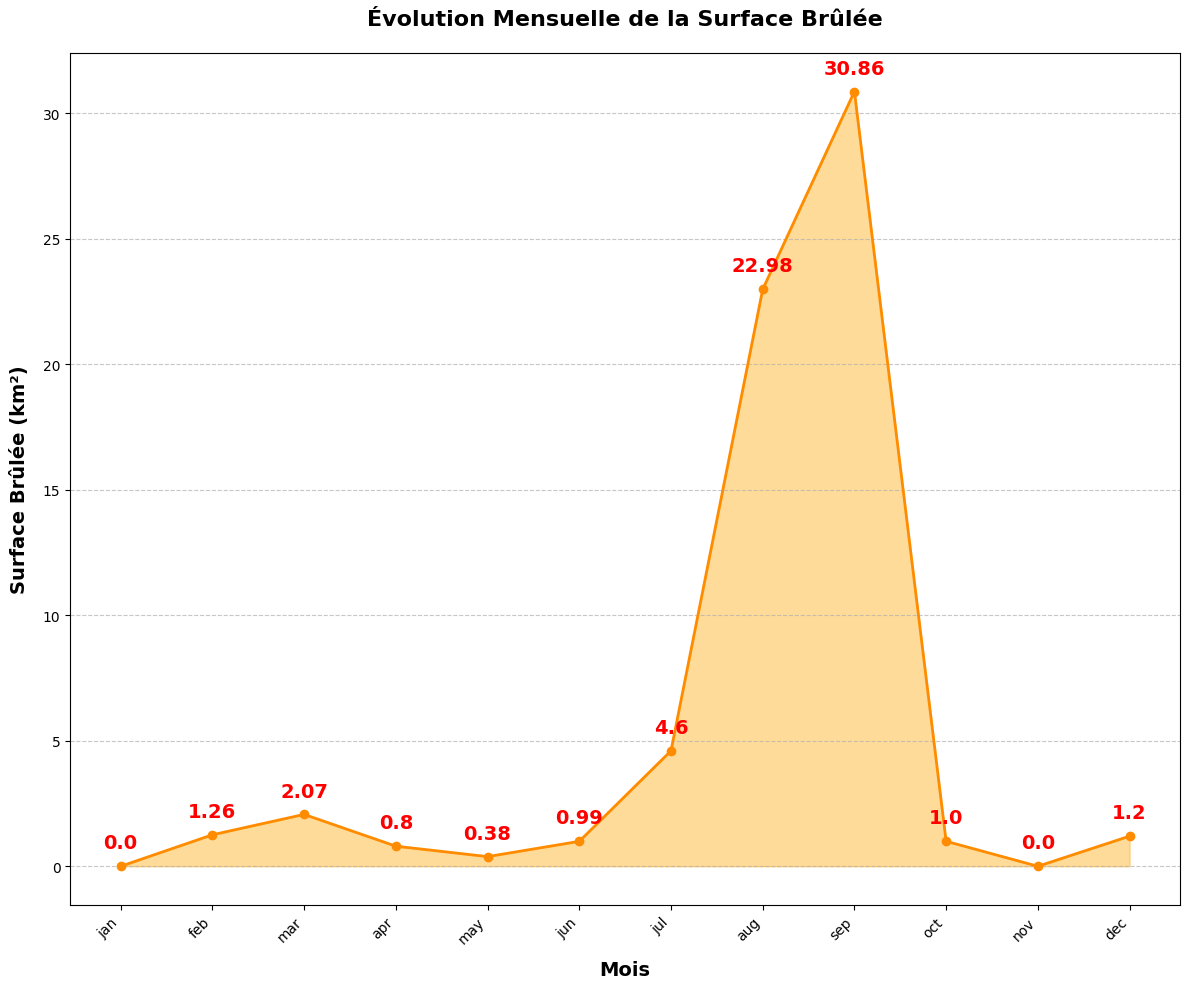

<Figure size 640x480 with 0 Axes>

In [38]:
# Liste des mois dans l'ordre chronologique
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convertir la colonne 'month' en type catégoriel avec l'ordre spécifié
df_forestfires['month'] = pd.Categorical(df_forestfires['month'], categories=month_order, ordered=True)

# Grouper par mois et calculer la somme de la surface brûlée
monthly_area = df_forestfires.groupby('month')['area_km2'].sum()

# Configuration du style
plt.figure(figsize=(12, 10))

# Création du graphique en aires
plt.fill_between(monthly_area.index, monthly_area.values, color='orange', alpha=0.4)  # Remplissage
plt.plot(monthly_area.index, monthly_area.values, marker='o', color='darkorange', linewidth=2)  # Ligne

# Ajouter des labels et un titre
plt.title('Évolution Mensuelle de la Surface Brûlée', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mois', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Surface Brûlée (km²)', fontsize=14,fontweight='bold', labelpad=10)

# Ajuster l'axe X
plt.xticks(rotation=45, ha='right')

# Ajouter une grille
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus de chaque point
for month, area in zip(monthly_area.index, monthly_area.values):
    plt.annotate(
        f"{round(area, 2)}",  # Texte à afficher (valeur arrondie à 2 décimales)
        xy=(month, area),  # Position du point
        xytext=(0, 10),  # Décalage du texte par rapport au point
        textcoords='offset points',  # Type de coordonnées pour xytext
        ha='center',  # Alignement horizontal du texte
        va='bottom',  # Alignement vertical du texte
        fontsize=14,
        fontweight='bold',# Taille de la police
        color='red'  # Couleur du texte
    )

# Afficher le graphique
plt.tight_layout()
plt.show()

# Exporter le graphique
plt.savefig('distribution_mensuelle_surface_brulée.png', dpi=300, bbox_inches='tight')

**Interprétation**

Septembre a la plus grande surface brulée, avec environ 31 km².

Août a la deuxième plus grande surface brulée, avec environ 23 km².

La plupart des autres mois ont une surface brulée d'environ 0 à 1 km², sauf juillet qui a environ 5 km² et mars qui a environ 2 km².

Janvier et mai ont la plus petite surface brulée.




*   Analyse des régions les plus touchées



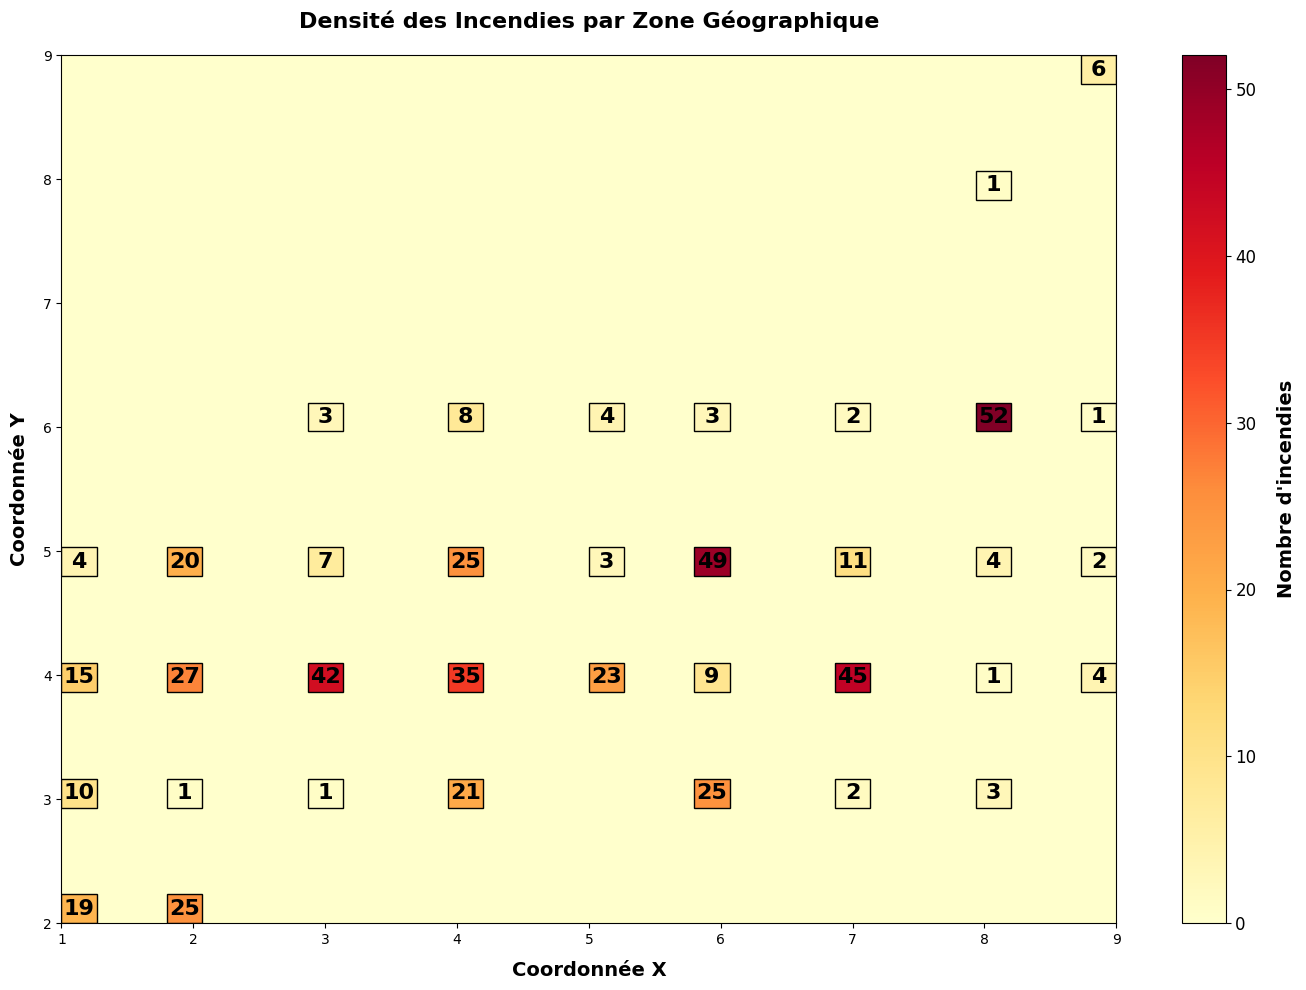

In [39]:
# Configuration du graphique
plt.figure(figsize=(14, 10))

# Création du graphique hist2d
counts, xedges, yedges, im = plt.hist2d(
    df_forestfires['X'], df_forestfires['Y'],
    bins=30,  # Nombre de bins (carrés) sur les axes X et Y
    cmap='YlOrRd',  # Palette de couleurs
)

# Barre de couleur
cbar = plt.colorbar(im, label='Nombre d\'incendies')
cbar.ax.tick_params(labelsize=12)  # Taille des labels de la barre de couleur
# Décaler le titre de la barre de couleur et le mettre en gras
cbar.set_label('Nombre d\'incendies', fontsize=14, fontweight='bold', labelpad=15)

# Titre et labels
plt.title('Densité des Incendies par Zone Géographique', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coordonnée X', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Coordonnée Y', fontsize=14, fontweight='bold', labelpad=10)

# Ajouter des annotations pour les carrés les plus denses
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        if counts[i, j] > 0:  # Annoter uniquement les carrés avec des données
            plt.annotate(
                f"{int(counts[i, j])}",  # Texte à afficher
                (xedges[i] + (xedges[i + 1] - xedges[i]) / 2, yedges[j] + (yedges[j + 1] - yedges[j]) / 2),  # Centre du carré
                ha='center', va='center',  # Alignement du texte
                fontsize=16,  # Taille de la police
                fontweight='bold',  # Texte en gras
                color='black' if counts[i, j] > np.median(counts) else 'black',  # Couleur du texte

            )
             # Ajouter une bordure autour du carré
            rect = patches.Rectangle(
                (xedges[i], yedges[j]),  # Coin inférieur gauche
                xedges[i + 1] - xedges[i],  # Largeur du carré
                yedges[j + 1] - yedges[j],  # Hauteur du carré
                linewidth=1,  # Épaisseur de la bordure
                edgecolor='black',  # Couleur de la bordure
                facecolor='none'  # Pas de remplissage
            )
            plt.gca().add_patch(rect)  # Ajouter le rectangle au graphique

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Les résultats suggèrent que la répartition des incendies est aléatoire et non corrélée aux coordonnées géographiques.

La variabilité des tailles des incendies sur cette grille géographique a une tendance à des incendies de taille petite à moyenne.

Les incendies de plus grande taille sont moins courants, un d'environ 10 km² à (6, 5) et un autre  à (8, 6) avec une aire d'environ 6 km².




*   Corrélation entre les facteurs météorologiques et la superficie brûlée



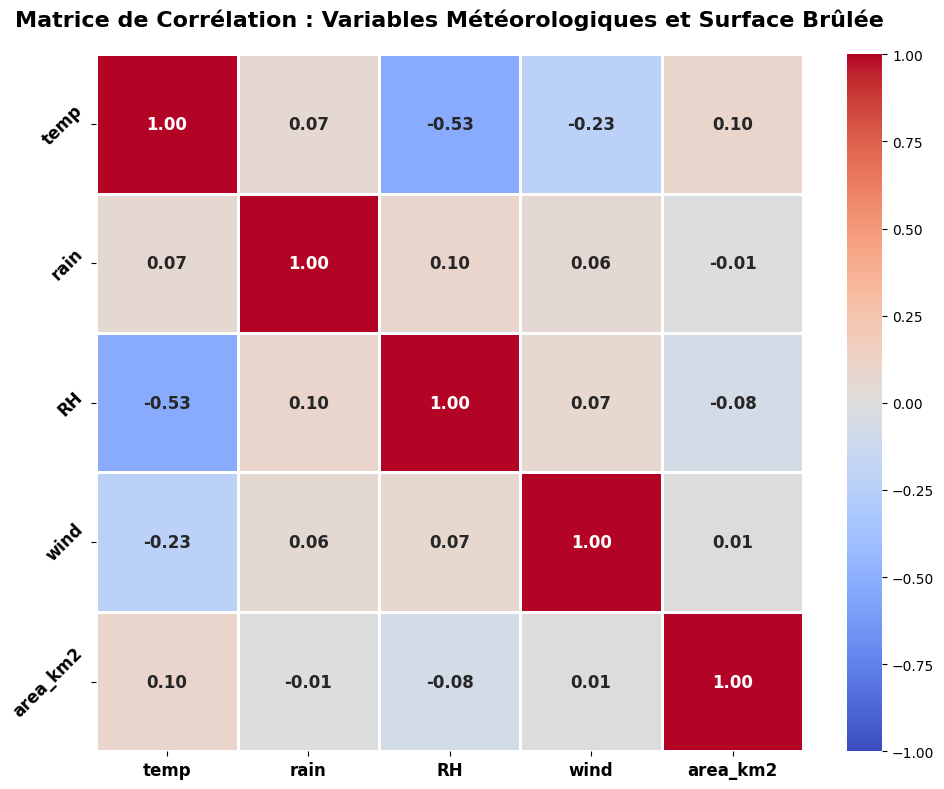

In [40]:
# Calcul de la matrice de corrélation
corr_matrix = df_forestfires[['temp', 'rain', 'RH', 'wind', 'area_km2']].corr()

# Configuration du graphique
plt.figure(figsize=(10, 8))  # Taille du graphique

# Création de la heatmap
sns.heatmap(
    corr_matrix,
    annot=True,  # Afficher les valeurs de corrélation
    fmt=".2f",  # Format des annotations (2 décimales)
    cmap='coolwarm',  # Palette de couleurs
    annot_kws={'size': 12, 'weight': 'bold'},  # Taille et style des annotations
    linewidths=1,  # Épaisseur des lignes entre les cellules
    vmin=-1, vmax=1  # Plage de valeurs pour la couleur
)

# Titre et labels
plt.title('Matrice de Corrélation : Variables Météorologiques et Surface Brûlée', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, fontweight='bold')  # Style des labels de l'axe X
plt.yticks(fontsize=12, fontweight='bold')  # Style des labels de l'axe Y
plt.yticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

1. FFMC (Fine Fuel Moisture Code) et DMC (Duff Moisture Code)
Corrélation : 0,68

Interprétation : Il existe une forte corrélation positive entre FFMC et DMC, ce qui suggère que ces deux indicateurs de l'humidité des combustibles forestiers varient de manière similaire.

2. DC (Drought Code) et ISI (Initial Spread Index)
Corrélation : 0,50

Interprétation : Il y a une corrélation positive modérée entre DC et ISI, indiquant que les conditions de sécheresse (DC) ont un impact sur la facilité de propagation des incendies (ISI).

3. Température (temp) et FFMC
Corrélation : 0,43

Interprétation : La température est positivement corrélée avec FFMC, ce qui suggère que des températures plus élevées sont associées à une humidité plus basse des combustibles forestiers.

4. Humidité relative (RH) et Température (temp)
Corrélation : -0,53

Interprétation : Il existe une corrélation négative modérée entre l'humidité relative et la température, ce qui est attendu puisque des températures plus élevées sont généralement associées à une humidité relative plus basse.

5. Vent (wind) et Pluie (rain)
Corrélation : 0,06
Interprétation : Il n'y a pas de corrélation significative entre la vitesse du vent et les précipitations, ce qui suggère que ces deux facteurs météorologiques varient de manière indépendante.

**Interprétation**


L'humidité relative (RH) est la variable météorologique qui montre la corrélation la plus notable (négative) avec la surface brûlée, bien que cette corrélation reste faible.

Les autres variables météorologiques (température, pluie, vent) ont des corrélations très faibles voire négligeables avec la surface brûlée dans cette analyse.

Il est important de noter que corrélation n'implique pas causalité.
 Cette matrice montre les relations linéaires entre les variables, mais d'autres facteurs non inclus ici pourraient jouer un rôle important dans la surface brûlée (par exemple, le type de végétation, l'activité humaine, etc.).
Les variables météorologiques entre elles montrent des corrélations attendues, comme la corrélation négative entre la température et l'humidité relative.

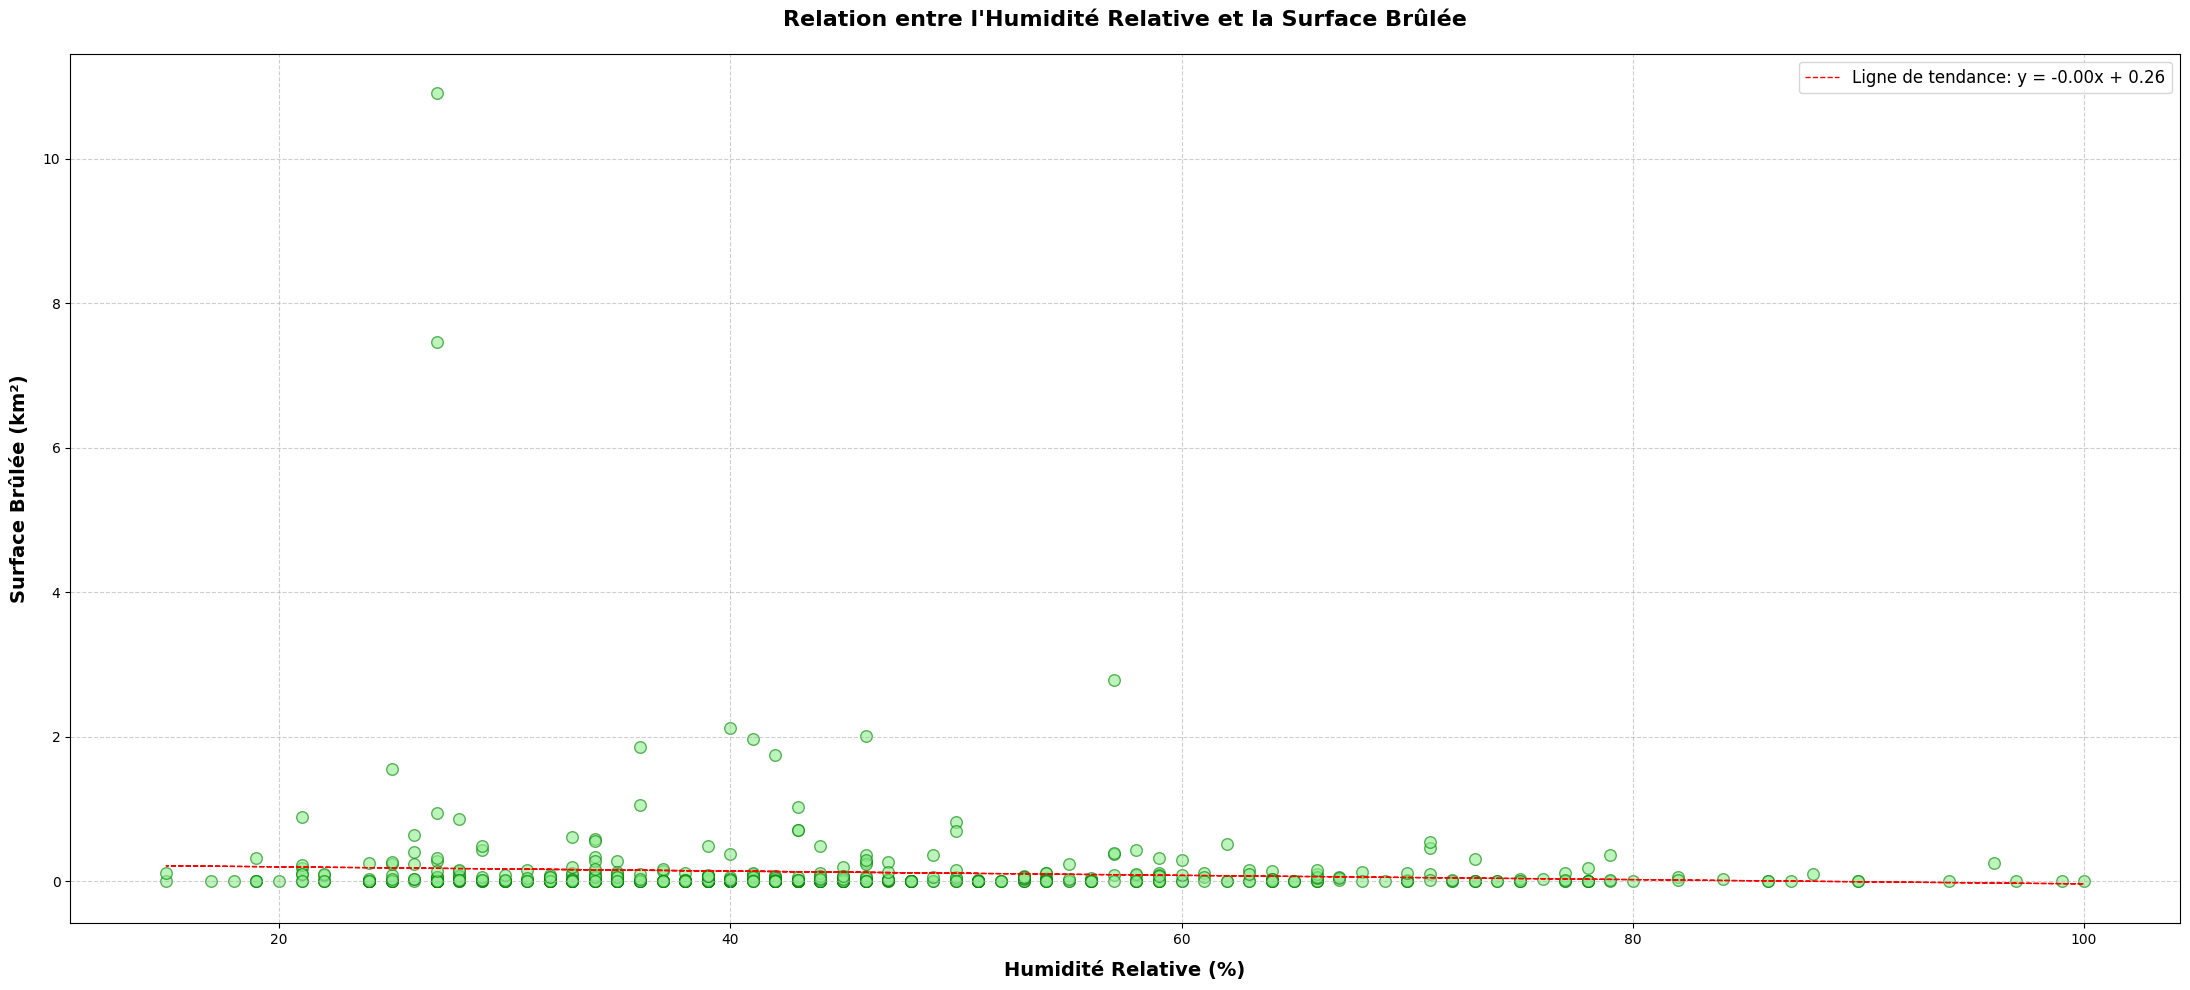

In [41]:
# Créer le scatter plot
plt.figure(figsize=(22, 10))  # Taille du graphique

# Scatter plot avec transparence et couleur personnalisée
plt.scatter(
    df_forestfires['RH'], df_forestfires['area_km2'],
    alpha=0.6,  # Transparence des points
    color='lightgreen',  # Couleur des points
    edgecolors='green',  # Contours
    s=70  # Taille des points
)

# Ajouter une ligne de tendance (linéaire)
z = np.polyfit(df_forestfires['RH'], df_forestfires['area_km2'], 1)  # 1 pour un polynôme de degré 1 (droite)
p = np.poly1d(z)
plt.plot(
    df_forestfires['RH'], p(df_forestfires['RH']),
    color='red',  # Couleur de la ligne
    linestyle='--',  # Style de la ligne (pointillé)
    linewidth=1,  # Épaisseur de la ligne
    label=f'Ligne de tendance: y = {z[0]:.2f}x + {z[1]:.2f}'  # Équation de la droite
)

# Titre et labels
plt.title('Relation entre l\'Humidité Relative et la Surface Brûlée', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Humidité Relative (%)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Surface Brûlée (km²)', fontsize=14, fontweight='bold', labelpad=10)

# Ajouter une légende
plt.legend(fontsize=12, loc='upper right')  # Position et style de la légende

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Si l'humidité relative est élevée, on a tendance à observer une surface brûlée moins importante



*  Quantité maximale de pluie enregistrée et date correspondante



**Interprétation**

Le jour le plus pluvieux est un mardi en août avec 6.4 mm de précipitations.




*   Analyse des saisons avec la fréquence d'incendies



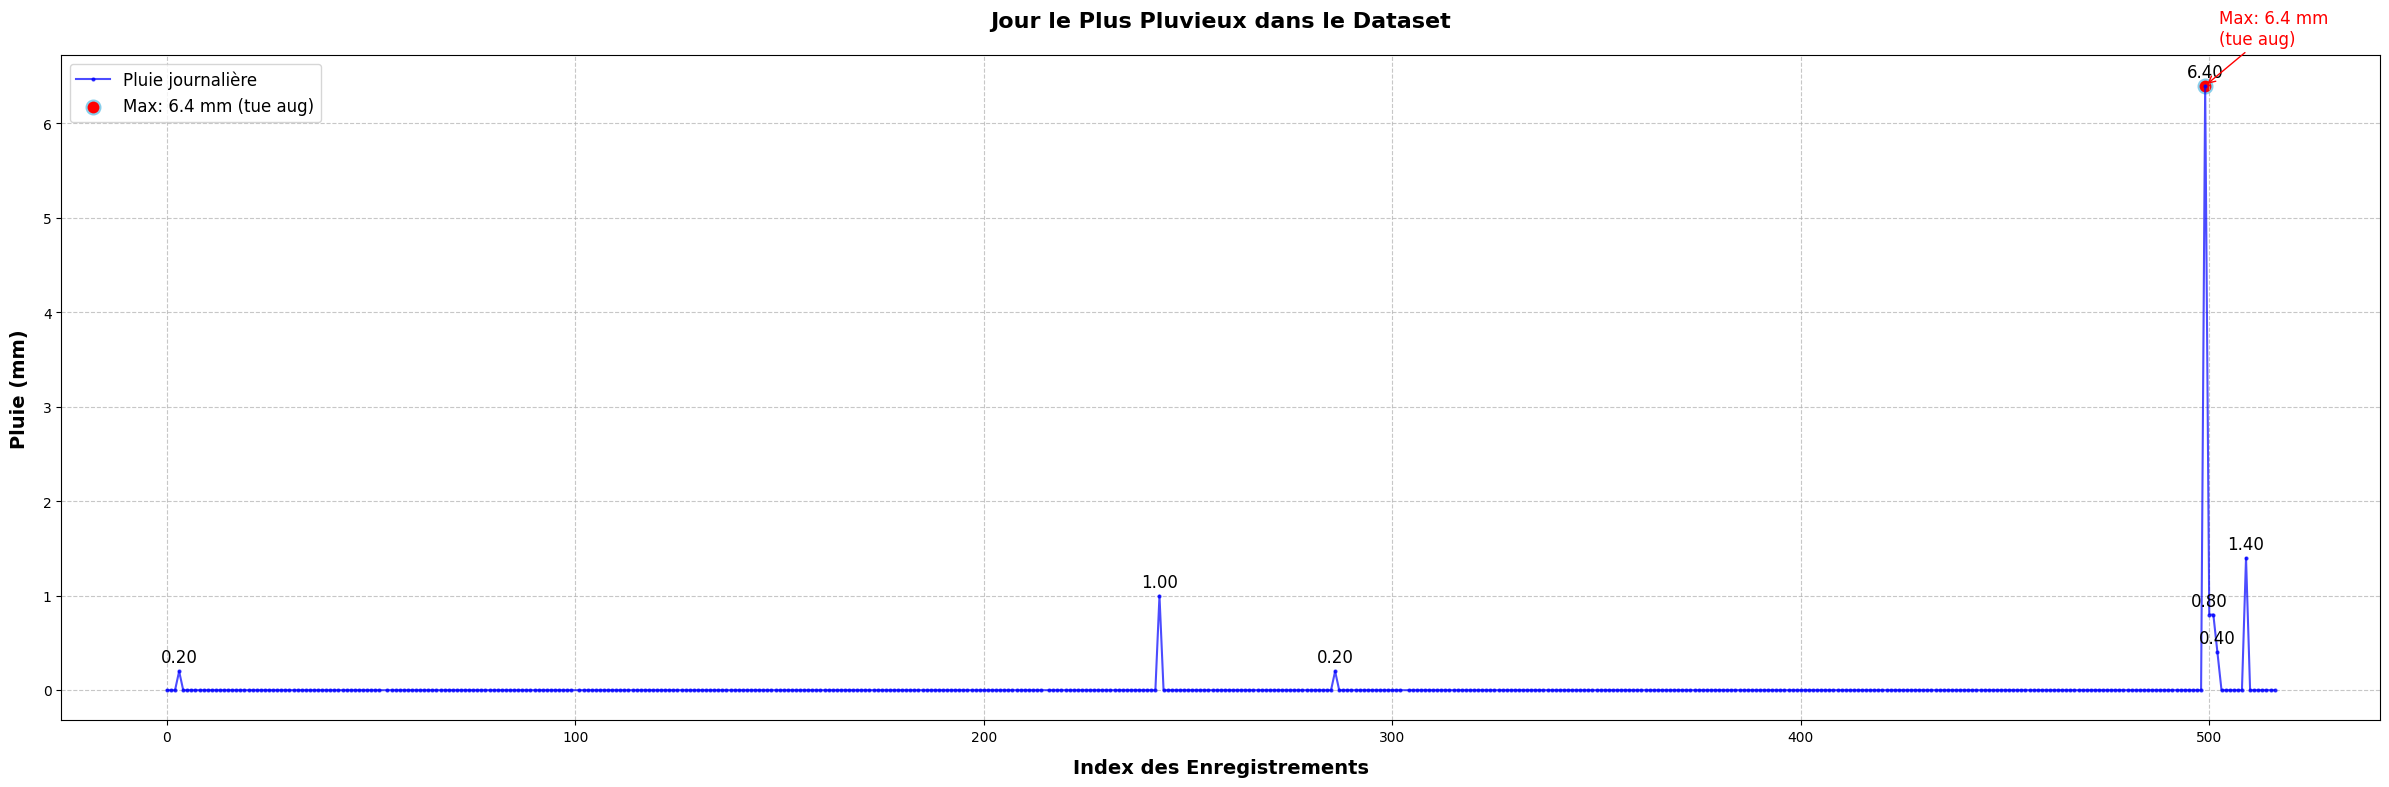

In [44]:
# Trouver la valeur maximale de pluie et son index
max_rain_value = df_forestfires['rain'].max()  # Récupère la valeur maximale de la colonne 'rain'
max_rain_index = df_forestfires['rain'].idxmax()  # Récupère l'index de cette valeur maximale

# Créer un DataFrame pour le jour avec la pluie maximale
max_rain = df_forestfires.loc[[max_rain_index]]  # Sélectionne la ligne correspondant à l'index du maximum

# Extraire le mois et le jour pour l'annotation
max_rain_month = max_rain['month'].values[0]  # Récupère le mois du jour le plus pluvieux
max_rain_day = max_rain['day'].values[0]  # Récupère le jour du jour le plus pluvieux

# Configuration du graphique
plt.figure(figsize=(24, 8))

# Graphique en ligne pour la pluie journalière
plt.plot(
    df_forestfires.index, df_forestfires['rain'],  # Axe x : index des enregistrements, Axe y : valeurs de pluie
    color='blue',  # Couleur de la ligne
    marker='o',  # Marqueurs pour chaque point
    markersize=2,  # Taille des marqueurs
    alpha=0.7,  # Transparence de la ligne
    label='Pluie journalière'  # Étiquette pour la légende
)

# Mettre en évidence le jour le plus pluvieux
plt.scatter(
    max_rain.index, max_rain['rain'],  # Position du point maximum
    color='red',  # Couleur du point maximum
    s=100,  # Taille du point maximum
    edgecolor='skyblue',  # Couleur de la bordure du point
    linewidth=1.5,  # Épaisseur de la bordure
    label=f'Max: {max_rain_value} mm ({max_rain_day} {max_rain_month})'  # Étiquette pour la légende
)

# Ajouter des annotations pour les valeurs supérieures à 0.2 mm et consécutives
for i in range(1, len(df_forestfires['rain'])):
    if df_forestfires['rain'].iloc[i] >= 0.2 and df_forestfires['rain'].iloc[i] != df_forestfires['rain'].iloc[i-1]:
        plt.text(df_forestfires.index[i], df_forestfires['rain'].iloc[i]+0.05, f'{df_forestfires["rain"].iloc[i]:.2f}', fontsize=12, ha='center', va='bottom')
        # Ajoute une annotation au-dessus des points de pluie supérieurs à 0.2 mm et non consécutifs

# Titre et labels
plt.title('Jour le Plus Pluvieux dans le Dataset', fontsize=16, fontweight='bold', pad=20)  # Titre du graphique
plt.xlabel('Index des Enregistrements', fontsize=14, fontweight='bold', labelpad=10)  # Label de l'axe x
plt.ylabel('Pluie (mm)', fontsize=14, fontweight='bold', labelpad=10)  # Label de l'axe y

# Ajouter une annotation pour le point maximum
plt.annotate(
    f'Max: {max_rain_value} mm\n({max_rain_day} {max_rain_month})',  # Texte de l'annotation
    xy=(max_rain.index[0], max_rain['rain'].iloc[0]),  # Position du point maximum
    xytext=(10, 30),  # Décalage du texte par rapport au point
    textcoords='offset points',  # Type de coordonnées pour xytext
    fontsize=12,  # Taille de la police
    color='red',  # Couleur du texte
    arrowprops=dict(arrowstyle='->', color='red')  # Flèche pointant vers le point
)

# Ajouter une légende
plt.legend(fontsize=12, loc='upper left')  # Position et style de la légende

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.7)  # Affiche une grille en arrière-plan

# Afficher le graphique
plt.tight_layout()  # Ajuste automatiquement les marges
plt.show()  # Affiche le graphique

In [ ]:
# Compter les incendies par saison
season_counts = df_forestfires['season'].value_counts()

# Définir les couleurs pour chaque saison
colors = ['gold', 'orange', 'lightgreen', 'lightblue']

# Exploser la partie correspondant à la saison avec le plus d'incendies
explode = (0.1, 0, 0, 0)  # Exploser la première part (saison avec le plus d'incendies)

# Configuration du graphique
plt.figure(figsize=(8, 8))  # Taille du graphique

# Créer le camembert
plt.pie(
    season_counts,
    labels=season_counts.index,  # Labels des saisons
    autopct='%1.1f%%',  # Pourcentage affiché avec 1 décimale
    startangle=90,  # Commencer à 90° pour une meilleure disposition
    colors=colors,  # Couleurs des parts
    explode=explode,  # Exploser une part
    shadow=True,  # Ajouter une ombre
    textprops={'fontsize': 14, 'fontweight': 'bold'}  # Taille de la police des labels
)

# Titre
plt.title('Fréquence des Incendies par Saison', fontsize=16, fontweight='bold', pad=20)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Ce diagramme circulaire montre la fréquence des incendies selon les saisons.

Il indique clairement que la majorité des incendies se produisent en été (44,8%).

L'automne suit avec une proportion significative (36,6%).

Le printemps représente 12,5% des incendies, tandis que l'hiver enregistre la plus faible fréquence, avec seulement 6%.

Le graphique met en évidence une corrélation forte entre la saison estivale et le risque d'incendie




In [46]:
# Définition des constantes pour les informations de connexion à la base de données
DBNAME = "forest_fires"
USER = "postgres"
PASSWORD = "admin"

def create_db_and_table_fires(dbname, user, password):
    try:
        # Connexion à la base de données par défaut 'postgres' pour créer une nouvelle base de données
        conn = psycopg2.connect(dbname="postgres", user=user, password=password)
        conn.autocommit = True  # Active le mode autocommit pour appliquer immédiatement les modifications
        cur = conn.cursor()  # Crée un curseur pour exécuter des requêtes SQL

        # Vérifie si la base de données existe déjà
        cur.execute(f"SELECT 1 FROM pg_database WHERE datname='{dbname}'")
        db_exists = cur.fetchone()
        if not db_exists:
            # Si la base de données n'existe pas, la créer
            cur.execute(f"CREATE DATABASE {dbname};")
            print(f"Database '{dbname}' created successfully.")
        else:
            print(f"Database '{dbname}' already exists.")
        conn.close()  # Ferme la connexion à la base de données par défaut

        # Connexion à la nouvelle base de données créée
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor()  # Crée un nouveau curseur pour exécuter des requêtes SQL

        # Vérifie si la table 'fires' existe déjà dans la base de données
        cur.execute("SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = 'fires');")
        table_exists = cur.fetchone()[0]
        if not table_exists:
            # Si la table n'existe pas, la créer avec la structure définie
            cur.execute("""
                CREATE TABLE fires (
                    id SERIAL PRIMARY KEY,
                    month VARCHAR(10),
                    day VARCHAR(10),
                    X INT,
                    Y INT,
                    temp FLOAT,
                    rain FLOAT,
                    RH FLOAT,
                    wind FLOAT,
                    area_km2 FLOAT,
                    season VARCHAR(10)
                );
            """)
            conn.commit()  # Valide la création de la table
            print("Table 'fires' created successfully.")
        else:
            print("Table 'fires' already exists.")
        conn.close()  # Ferme la connexion à la base de données

    except psycopg2.Error as e:
        # Gère les erreurs de connexion ou d'exécution de requêtes SQL
        print(f"Error creating database or table: {e}")

# Appel de la fonction avec les informations de connexion définies
create_db_and_table_fires(DBNAME, USER, PASSWORD)


Error creating database or table: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
	Is the server running locally and accepting connections on that socket?



In [47]:
# Définition des constantes pour les informations de connexion à la base de données
DBNAME = "forest_fires"
USER = "postgres"
PASSWORD = "admin"

def insert_table_fires(dbname, user, password, df_forestfires):
    try:
        # Connexion à la base de données spécifiée
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor()  # Crée un curseur pour exécuter des requêtes SQL

        # Itération sur chaque ligne du DataFrame `df_forestfires`
        for index, row in df_forestfires.iterrows():
            try:
                # Insertion des données de chaque ligne dans la table `fires`
                cur.execute("""
                    INSERT INTO fires (month, day, X, Y, temp, rain, RH, wind, area_km2, season)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """, (
                    row['month'], row['day'], row['X'], row['Y'], row['temp'],
                    row['rain'], row['RH'], row['wind'], row['area_km2'], row['season']
                ))
            except Exception as e:
                # En cas d'erreur lors de l'insertion d'une ligne, affiche un message d'erreur
                print(f"Error inserting row {index}: {e}")
                conn.rollback()  # Annule la transaction en cours
                raise  # Relève l'exception pour arrêter l'insertion

        # Valide toutes les insertions effectuées
        conn.commit()
        print("Data inserted successfully.")

    except psycopg2.Error as e:
        # Gère les erreurs de connexion ou d'exécution de requêtes SQL
        print(f"Error populating database: {e}")
    except Exception as e:
        # Gère les autres erreurs inattendues
        print(f"An unexpected error occurred: {e}")
    finally:
        # Ferme la connexion à la base de données, même en cas d'erreur
        if conn:
            conn.close()


In [48]:
# Définition des constantes pour les informations de connexion à la base de données
DBNAME = "forest_fires"
USER = "postgres"
PASSWORD = "admin"

def execute_query(query, dbname, user, password):
    try:
        # Connexion à la base de données spécifiée
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor()  # Crée un curseur pour exécuter des requêtes SQL

        # Exécution de la requête SQL passée en paramètre
        cur.execute(query)

        # Récupération de toutes les lignes résultantes de la requête
        rows = cur.fetchall()

        # Affichage des résultats ligne par ligne
        for row in rows:
            print(row)

        # Fermeture de la connexion à la base de données
        conn.close()

    except psycopg2.Error as e:
        # Gère les erreurs de connexion ou d'exécution de requêtes SQL
        print(f"Error executing query: {e}")

# Définition de la requête SQL pour calculer l'aire moyenne mensuelle des feux de forêt
query_aire_moyenne_mensuelle = """
    SELECT month, AVG(area_km2) AS avg_area
    FROM fires
    GROUP BY month
    ORDER BY avg_area DESC;
"""

# Exécution de la requête SQL définie
execute_query(query_aire_moyenne_mensuelle, DBNAME, USER, PASSWORD)


Error executing query: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
	Is the server running locally and accepting connections on that socket?

